In [1]:
# cellule de imports (aucun param a changer)
%matplotlib notebook

import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
# cellule de fonction (aucun param a changer)
def onclick(event):
    """
    Fonction permettant de positionner les interfaces du capillaire avec un clic de la souris
    :param event:
    :return:
    """
    tx = 'coord: x=%.2f, y=%.2f' % (event.xdata, event.ydata)
    text.set_text(tx)
    coords.append([event.xdata, event.ydata])

In [3]:
# cellule de variable (changer le path vers les images)
# obtenir le path vers l'image dans l'eau
path_image_0 = "data/data_test_oct_billes_0_degree.nii"
# obtenir le path vers l'image de ref dans l'eau
path_image_180 = "data/data_test_oct_1degree.nii"

Le format de l'image est (x:512, y:512, z:576)


<IPython.core.display.Javascript object>


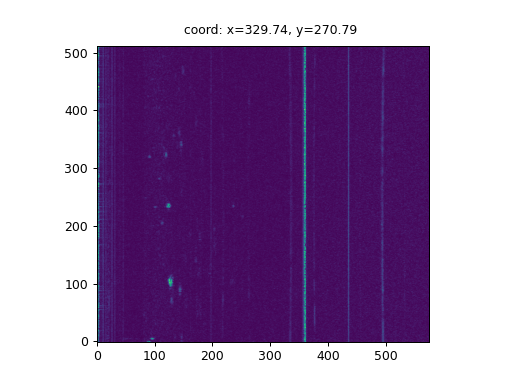

In [4]:
# cellule (si l'image est un C_scan choisir une slice (x_tube) pour segmenter un B_scan)
# get image (z: axe de propagation laser, y: axe de rotation capillaire, x: axe perpendiculaire
# a la rotation capillaire)
image = nib.load(path_image_0)
# extraire le format de l'image
nx, ny, nz = image.shape
print("Le format de l'image est (x:{}, y:{}, z:{})".format(nx, ny, nz))
# extraire un b_scan avec plan 'zy'
data = image.get_fdata()
x_tube = 310
b_scan = data[:, x_tube, :]

global coords
coords = []
    
fig = plt.figure("cliquer sur les parois sup puis inf et fermer")
ax = fig.add_subplot(111)
ax.imshow(b_scan, origin="lower")
text = ax.text(150,550, "", va="top", ha="left")
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [5]:
# Entrée des coordonnées des parois
    # Image 0 degrés
    # Paroi intérieure supérieure
x_0_sup = coords[0][0]
z_0_sup = coords[0][1] 
print("les coordonnees de la paroi sup sont x: {} et z: {}".format(x_0_sup, z_0_sup))
    # Paroi intérieure inférieure
x_0_inf = coords[1][0]
z_0_inf = coords[1][1]
print("les coordonnees de la paroi inf sont x: {} et z: {}".format(x_0_inf, z_0_inf))

les coordonnees de la paroi sup sont x: 89.49843716889171 et z: 273.88520191929285
les coordonnees de la paroi inf sont x: 329.74304104985924 et z: 270.78527154663516


Le format de l'image est (x:512, y:512, z:576)


<IPython.core.display.Javascript object>


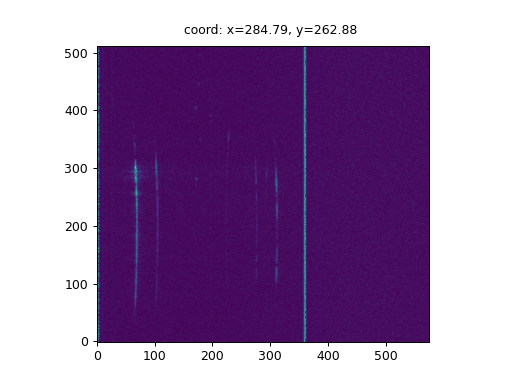

In [6]:
# cellule (si l'image est un C_scan choisir une slice (x_tube) pour segmenter un B_scan)
image = nib.load(path_image_180)
nx, ny, nz = image.shape
print("Le format de l'image est (x:{}, y:{}, z:{})".format(nx, ny, nz))
# extraire un b_scan avec plan 'zy'
data = image.get_fdata()
x_tube = 310
b_scan = data[:, x_tube, :]

global coords
coords = []
    
fig = plt.figure("cliquer sur les parois sup puis inf et fermer 2")
ax = fig.add_subplot(111)
ax.imshow(b_scan, origin="lower")
text = ax.text(150,550, "", va="top", ha="left")
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [7]:
# Entrée des coordonnées des parois 
    # Image 180 degrés
    # Paroi intérieure supérieure
x_180_sup = coords[0][0]
z_180_sup = coords[0][1]
print("les coordonnees de la paroi sup sont x: {} et z: {}".format(x_0_sup, z_0_sup))
    # Paroi intérieure inférieure
x_180_inf = coords[1][0]
z_180_inf = coords[1][1]
print("les coordonnees de la paroi inf sont x: {} et z: {}".format(x_0_inf, z_0_inf))

les coordonnees de la paroi sup sont x: 89.49843716889171 et z: 273.88520191929285
les coordonnees de la paroi inf sont x: 329.74304104985924 et z: 270.78527154663516


In [8]:
# Calcul du point milieu 0 degrés 
x_0_milieu = x_0_inf + (x_0_sup - x_0_inf)/2
z_0_milieu = z_0_inf + (z_0_sup - z_0_inf)/2
print("les coordonnees du centre du capillaire (0 deg) sont x: {} et z: {}".format(x_0_milieu, z_0_milieu))

# Calcul du point milieu 180 degrés 
x_180_milieu = x_180_inf + (x_180_sup - x_180_inf)/2
z_180_milieu = z_180_inf + (z_180_sup - z_180_inf)/2
print("les coordonnees du centre du capillaire (180 deg) sont x: {} et z: {}".format(x_180_milieu, z_180_milieu))

les coordonnees du centre du capillaire (0 deg) sont x: 209.62073910937548 et z: 272.335236732964
les coordonnees du centre du capillaire (180 deg) sont x: 190.24617428026522 et z: 265.20534011443107


In [9]:
# Calcul de la distance de désaxage
deltaX = 3.91 # en um
deltaZ = 6.53 # en um

desaxage = np.sqrt(((x_0_milieu-x_180_milieu)*deltaX)**2+((z_0_milieu-z_180_milieu)*deltaZ)**2)/2

print('Le désaxage de capillaire est de', desaxage, 'um.')

Le désaxage de capillaire est de 44.459025864538035 um.
